### Importanto biblioteca


In [54]:
import pandas as pd


### Carregar arquivo CSV


In [55]:
dados = pd.read_csv("PDA_2020_Unidades_Rede_Federal_EPCT.csv", sep=";", encoding="cp1252")
dados

,SIGLA_INSTITUICAO,NOME_UNIDADE_ENSINO,ANO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO
0,IFAC,Campus Cruzeiro do Sul,2011,AC,Cruzeiro do Sul
1,IFAC,Campus Rio Branco,2011,AC,Rio Branco
2,IFAC,Campus Avançado Rio Branco Baixada do Sol,2014,AC,Rio Branco
3,IFAC,Campus Sena Madureira,2011,AC,Sena Madureira
4,IFAC,Campus Tarauac,2013,AC,Tarauac
...,...,...,...,...,...
660,IFTO,Campus Avançado Lagoa da Confusão,2014,TO,Lagoa da Confusão
661,IFTO,Campus Palmas,1993,TO,Palmas
662,IFTO,Campus Paraíso do Tocantins,2007,TO,Paraíso do Tocantins
663,IFTO,Campus Avançado Pedro Afonso,2014,TO,Pedro Afonso


In [56]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   SIGLA_INSTITUICAO              665 non-null    object
 1   NOME_UNIDADE_ENSINO            665 non-null    object
 2   ANO                            665 non-null    int64 
 3   SIGLA_UF_UNIDADE_ENSINO        665 non-null    object
 4   NOME_MUNICIPIO_UNIDADE_ENSINO  665 non-null    object
dtypes: int64(1), object(4)
memory usage: 26.1+ KB


In [57]:
# quantas unidades existem em cada estado do brasil
dados["SIGLA_UF_UNIDADE_ENSINO"].value_counts().sort_values(ascending=False)

,count
SIGLA_UF_UNIDADE_ENSINO,
MG,71
RJ,50
RS,44
SC,38
PR,37
SP,37
BA,37
CE,34
MA,30


In [58]:
uf_regiao = {
    "MG": "Sudeste", "RJ": "Sudeste", "SP": "Sudeste", "ES": "Sudeste",
    "RS": "Sul", "SC": "Sul", "PR": "Sul",
    "BA": "Nordeste", "CE": "Nordeste", "MA": "Nordeste", "RN": "Nordeste",
    "PB": "Nordeste", "PE": "Nordeste", "PI": "Nordeste", "AL": "Nordeste", "SE": "Nordeste",
    "GO": "Centro-Oeste", "MT": "Centro-Oeste", "MS": "Centro-Oeste", "DF": "Centro-Oeste",
    "PA": "Norte", "AM": "Norte", "TO": "Norte", "RO": "Norte", "RR": "Norte", "AC": "Norte", "AP": "Norte"}



dados["REGIAO"] = dados["SIGLA_UF_UNIDADE_ENSINO"].map(uf_regiao)

dados.head()

,SIGLA_INSTITUICAO,NOME_UNIDADE_ENSINO,ANO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO,REGIAO
0,IFAC,Campus Cruzeiro do Sul,2011,AC,Cruzeiro do Sul,Norte
1,IFAC,Campus Rio Branco,2011,AC,Rio Branco,Norte
2,IFAC,Campus Avançado Rio Branco Baixada do Sol,2014,AC,Rio Branco,Norte
3,IFAC,Campus Sena Madureira,2011,AC,Sena Madureira,Norte
4,IFAC,Campus Tarauac,2013,AC,Tarauac,Norte


In [59]:
# quantidade de escolas em cada região do Brasil
dados["REGIAO"].value_counts()

,count
REGIAO,
Nordeste,225
Sudeste,180
Sul,119
Norte,75
Centro-Oeste,66


In [60]:
# contagem por unidade de feredação (Estados)
dados["SIGLA_UF_UNIDADE_ENSINO"].value_counts()

,count
SIGLA_UF_UNIDADE_ENSINO,
MG,71
RJ,50
RS,44
SC,38
PR,37
SP,37
BA,37
CE,34
MA,30


<Axes: xlabel='SIGLA_UF_UNIDADE_ENSINO'>

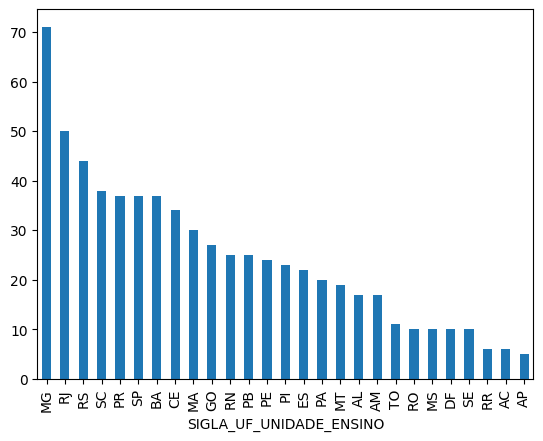

In [61]:
# Dados em gráfico
%matplotlib inline

# Escolas por UF em gráfico de barras

dados["SIGLA_UF_UNIDADE_ENSINO"].value_counts().plot.bar()

In [62]:
# importar apenas algumas colunas

# 3 - hospital, 6- município, 7 - complexidade, 8- carater atendimento
# 12- sub grupo procedimento, 14- procedimento

cirurgia = pd.read_csv("cirurgiasinternacao2023.csv", sep=";", encoding="cp1252", usecols=[2,3,4])
cirurgia

,i_desc_complex_proc,i_desc_estab_cnes,i_desc_proc_realizado
0,Alta complexidade,0010456 - HBDF,0201010372 - BIOPSIA DE PELE E PARTES MOLES
1,Alta complexidade,0010456 - HBDF,0201010437 - BIOPSIA DE RIM POR PUNCAO
2,Alta complexidade,0010456 - HBDF,0201010631 - PUNÇÃO LOMBAR
3,Alta complexidade,0010456 - HBDF,0403010020 - CRANIOTOMIA DESCOMPRESSIVA
4,Alta complexidade,0010456 - HBDF,0403010039 - CRANIOTOMIA DESCOMPRESSIVA DA FOS...
...,...,...,...
21755,Média complexidade,7978642 - Hosp. Daher Lago Sul,0404010016 - ADENOIDECTOMIA
21756,Média complexidade,7978642 - Hosp. Daher Lago Sul,0404010032 - AMIGDALECTOMIA C/ ADENOIDECTOMIA
21757,Alta complexidade,9710248 - CENTRO CLINICO JARDIM BOTANICO,0405050372 - FACOEMULSIFICACAO C/ IMPLANTE DE ...
21758,Média complexidade,9710248 - CENTRO CLINICO JARDIM BOTANICO,0407020276 - FISTULECTOMIA / FISTULOTOMIA ANAL


In [63]:
# trocar nome das colunas
cirurgia.columns= ["Complexidade", "Hospital", "Procedimento"]
cirurgia.head(3)

,Complexidade,Hospital,Procedimento
0,Alta complexidade,0010456 - HBDF,0201010372 - BIOPSIA DE PELE E PARTES MOLES
1,Alta complexidade,0010456 - HBDF,0201010437 - BIOPSIA DE RIM POR PUNCAO
2,Alta complexidade,0010456 - HBDF,0201010631 - PUNÇÃO LOMBAR


In [64]:
cirurgia.describe()

,Complexidade,Hospital,Procedimento
count,21760,20290,21760
unique,2,30,1264
top,Média complexidade,0010456 - HBDF,0407030034 - COLECISTECTOMIA VIDEOLAPAROSCOPICA
freq,16654,4584,199


In [65]:
# listar hospitais presentes nos dados
cirurgia["Hospital"].unique()

array(['0010456 - HBDF', '0010464 - HRAN', '0010472 - HRG',
       '0010480 - HRC', '0010499 - HRT', '0010502 - HRS', '0010510 - HUB',
       '0010529 - HRPL', '0010537 - HMIB', '0010545 - HRBz',
       '0049867 - IMPAR AGUAS CLARAS', '2645157 - HRL', '2672197 - HRSam',
       '3018520 - Hosp. São Francisco',
       '3025020 - Pronto Socorro de Fraturas',
       '3030121 - Hosp Anchieta Ltda', '3055450 - CBV', '3276678 - ICTDF',
       '5717515 - HRSM', '6243495 - Home Hosp. Ort. Med. Esp.',
       '6730914 - Hosp. São Mateus', '6876617 - HCB',
       '7978642 - Hosp. Daher Lago Sul', nan,
       '2866161 - HOSPITAL ANNA NERY', '2649497 - Hosp. Sta Marta',
       '3013162 - Hosp Maria Auxiliadora',
       '9710248 - CENTRO CLINICO JARDIM BOTANICO',
       '0426067 - RENOVA HOSPITAL DIA', '2814897 - HRGu',
       '2779366 - Oftalmed Matriz'], dtype=object)

In [66]:
# quantas cirurgias foram realizadas em cada hospital
cirurgia["Hospital"].value_counts()

# conta a qtd de linhas para cada valor único do hospital

,count
Hospital,
0010456 - HBDF,4584
5717515 - HRSM,2107
0010499 - HRT,1720
0010510 - HUB,1420
2645157 - HRL,1386
6876617 - HCB,1322
0010480 - HRC,1274
0010472 - HRG,1238
0010464 - HRAN,1127


In [67]:
# quantos procedimentos
cirurgia["Procedimento"].value_counts()

,count
Procedimento,
0407030034 - COLECISTECTOMIA VIDEOLAPAROSCOPICA,199
0412040166 - TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA,180
0407040102 - HERNIOPLASTIA INGUINAL / CRURAL (UNILATERAL),174
0407040129 - HERNIOPLASTIA UMBILICAL,172
0407020039 - APENDICECTOMIA,158
...,...
0408050802 - TRATAMENTO CIRÚRGICO DE PSEUDARTROSE / RETARDO DE CONSOLIDAÇÃO / PERDA ÓSSEA DA REGIÃO TROCANTERIANA,1
0408030054 - ARTRODESE CERVICAL / CERVICO-TORÁCICA POSTERIOR TRES NÍVEIS,1
0201010496 - BIOPSIA DE URETRA,1


<Axes: xlabel='Complexidade'>

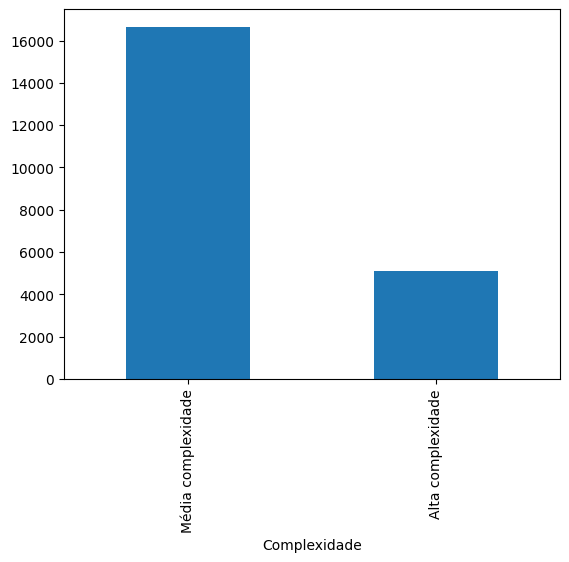

In [68]:
# plotar o gráfico
cirurgia["Complexidade"].value_counts().plot.bar()

In [69]:
# criar um subconjunto do dados originais - Hospital de Base

hosp_base = cirurgia[cirurgia["Hospital"] == "0010456 - HBDF"]

# dataframe novo terá só linha onde nome do hospital seja HBDF

#linhas iniciais
hosp_base.head(2)

,Complexidade,Hospital,Procedimento
0,Alta complexidade,0010456 - HBDF,0201010372 - BIOPSIA DE PELE E PARTES MOLES
1,Alta complexidade,0010456 - HBDF,0201010437 - BIOPSIA DE RIM POR PUNCAO


In [70]:
hosp_base.tail(4)

,Complexidade,Hospital,Procedimento
20442,Média complexidade,0010456 - HBDF,0415040027 - DEBRIDAMENTO DE FASCEITE NECROTIZ...
20443,Média complexidade,0010456 - HBDF,0415040035 - DEBRIDAMENTO DE ULCERA / DE TECID...
20444,Média complexidade,0010456 - HBDF,0418010056 - IMPLANTE DE CATETER DUPLO LUMEN N...
20445,Média complexidade,0010456 - HBDF,0418010072 - IMPLANTE DE CATETER TENCKHOFF OU ...


In [71]:
# listar linhas aleatórias
hosp_base.sample(5)


,Complexidade,Hospital,Procedimento
6794,Alta complexidade,0010456 - HBDF,0403010136 - MICROCIRURGIA DA SIRINGOMIELIA
6798,Alta complexidade,0010456 - HBDF,0403020093 - NEUROTOMIA SELETIVA DE TRIGEMEO E...
76,Alta complexidade,0010456 - HBDF,0406040150 - CORREÇÃO ENDOVASCULAR DE ANEURISM...
3553,Média complexidade,0010456 - HBDF,0409010219 - NEFRECTOMIA TOTAL
3408,Média complexidade,0010456 - HBDF,0404010326 - SINUSOTOMIA BILATERAL


In [72]:
# quantidade de procedimento realizados no Hospital de Base
hosp_base["Procedimento"].value_counts()

,count
Procedimento,
0201010372 - BIOPSIA DE PELE E PARTES MOLES,24
0201010631 - PUNÇÃO LOMBAR,24
0403010020 - CRANIOTOMIA DESCOMPRESSIVA,22
0412010127 - TRAQUEOSTOMIA COM COLOCAÇÃO DE ORTESE TRAQUEAL OU TRAQUEOBRONQUICA,22
0412030128 - RETIRADA DE DRENO TUBULAR TORACICO,21
...,...
0408030410 - DISCECTOMIA CERVICAL / LOMBAR / LOMBO-SACRA POR VIA POSTERIOR (DOIS OU MAIS NÍVEIS C/ MICROSCÓPIO),1
0412040026 - ESTERNECTOMIA COM OU SEM PRÓTESE,1
0414020030 - APROFUNDAMENTO DE VESTÍBULO ORAL (POR SEXTANTE),1


In [73]:
# podemos subdividir o dataframe com base em pedaço de palavra

hosp_base[hosp_base["Procedimento"].str.contains("AMPUTA")].count()

# Amputação
# string que contém amputa, count - contagem
# 95 amputações

,0
Complexidade,95
Hospital,95
Procedimento,95


In [74]:
# Dividir o dataframe pelo procedimento de parto cesariano

biopsia = cirurgia[cirurgia["Procedimento"] == "0201010372 - BIOPSIA DE PELE E PARTES MOLES"]
biopsia

,Complexidade,Hospital,Procedimento
0,Alta complexidade,0010456 - HBDF,0201010372 - BIOPSIA DE PELE E PARTES MOLES
143,Média complexidade,0010456 - HBDF,0201010372 - BIOPSIA DE PELE E PARTES MOLES
359,Média complexidade,0010464 - HRAN,0201010372 - BIOPSIA DE PELE E PARTES MOLES
812,Alta complexidade,0010510 - HUB,0201010372 - BIOPSIA DE PELE E PARTES MOLES
877,Média complexidade,0010510 - HUB,0201010372 - BIOPSIA DE PELE E PARTES MOLES
...,...,...,...
21002,Média complexidade,NaN,0201010372 - BIOPSIA DE PELE E PARTES MOLES
21357,Média complexidade,2672197 - HRSam,0201010372 - BIOPSIA DE PELE E PARTES MOLES
21390,Média complexidade,2814897 - HRGu,0201010372 - BIOPSIA DE PELE E PARTES MOLES
21475,Média complexidade,5717515 - HRSM,0201010372 - BIOPSIA DE PELE E PARTES MOLES


In [75]:
# quantidade de biopsia por hospital

biopsia["Hospital"].value_counts()

,count
Hospital,
0010456 - HBDF,24
0010510 - HUB,18
0010464 - HRAN,17
6876617 - HCB,6
5717515 - HRSM,4
0010499 - HRT,2
2672197 - HRSam,2
2645157 - HRL,1
0010472 - HRG,1


In [76]:
# Verifica a quantidade de biopsias por Complexidade

biopsia["Complexidade"].value_counts()

,count
Complexidade,
Média complexidade,61
Alta complexidade,35


<Axes: ylabel='Hospital'>

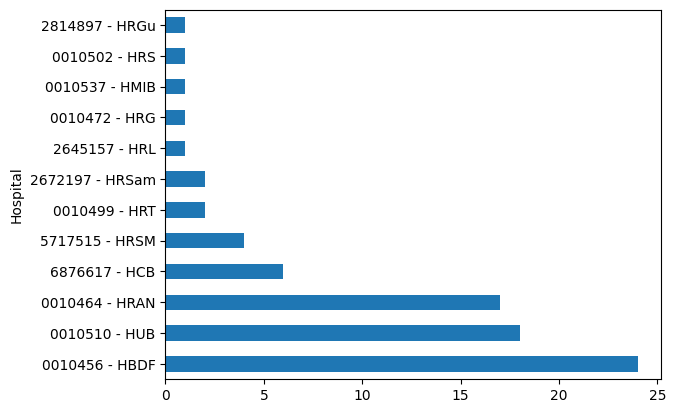

In [77]:
# Plotar gráfico de barras horizontal dos hospitais - biopsia

biopsia["Hospital"].value_counts().plot.barh()

<Axes: title={'center': 'Quantidade de Biopsias de Pele e Partes Moles por Hospital'}, ylabel='Hospital'>

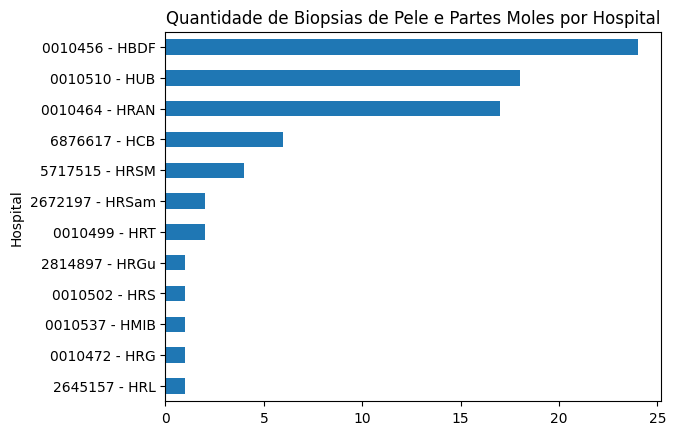

In [78]:
# Melhorando o gráfico - inverter a ordem e adicionar título.
biopsia["Hospital"].value_counts(ascending=True).plot.barh(
    title="Quantidade de Biopsias de Pele e Partes Moles por Hospital")

#### CURSOS PROUNI

In [79]:
prouni = pd.read_csv("cursos-prouni.csv")
prouni.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


In [80]:
prouni.shape

#  41.447 linhas e 20 colunas

(41447, 20)

In [81]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41447 entries, 0 to 41446
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   grau                  41447 non-null  object 
 1   turno                 41447 non-null  object 
 2   mensalidade           41447 non-null  float64
 3   bolsa_integral_cotas  32520 non-null  float64
 4   bolsa_integral_ampla  25404 non-null  float64
 5   bolsa_parcial_cotas   8828 non-null   float64
 6   bolsa_parcial_ampla   13041 non-null  float64
 7   curso_id              41447 non-null  int64  
 8   curso_busca           41447 non-null  object 
 9   cidade_busca          41447 non-null  object 
 10  uf_busca              41447 non-null  object 
 11  cidade_filtro         41447 non-null  object 
 12  universidade_nome     41447 non-null  object 
 13  campus_nome           41447 non-null  object 
 14  campus_id             41447 non-null  int64  
 15  nome               

 - memory usage: 6.3+ MB - quantidade de memória usada no pandas

In [82]:
# análise matemática das colunas numéricas

prouni.describe()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,campus_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,41447.000000,32520.000000,25404.000000,8828.000000,13041.000000,4.144700e+04,4.144700e+04,32520.000000,16802.000000,16350.000000,5519.000000
mean,622.636966,1.535394,2.513541,1.873018,8.632544,4.207360e+13,6.786530e+05,575.982999,564.470439,527.517136,511.799638
std,606.442296,2.191578,3.019549,2.336403,18.372991,6.061552e+13,6.398410e+05,57.827594,57.869145,60.202170,56.787140
min,139.000000,0.000000,1.000000,1.000000,1.000000,2.248801e+07,2.240000e+02,450.000000,450.000000,450.000000,450.000000
25%,278.000000,0.000000,1.000000,1.000000,1.000000,6.460131e+11,1.172300e+04,544.360000,532.865000,453.980000,450.000000
50%,393.350000,1.000000,1.000000,1.000000,2.000000,2.003572e+12,6.587550e+05,580.740000,571.450000,532.420000,511.820000
75%,825.000000,2.000000,3.000000,2.000000,6.000000,1.036636e+14,1.058794e+06,614.145000,603.315000,573.235000,557.170000
max,9999.990000,58.000000,67.000000,74.000000,350.000000,2.008632e+14,2.008633e+06,781.200000,792.240000,776.360000,768.340000


- Há campos vazios por exemplo no bolsa integral, porque não foi formado ou não é importante etc.
- Dessa maneira é preciso tomar decisiões, está faltando e decidir o que vai fazer ou ir atrás desses valores.

##### Análise de dados

- Em média, os custos das mensalidades é R$ 622,63 reais.

- O desvio (std) padrão é 606.44

- Os cursos mais baratos (min) custam R$  139 reais.

- E os mais caros custam (max) 9999 ou seja, R$ 10 mil reais.

- Até 75% dos valores estão R$ 825 reais



### Respondendo perguntas

In [83]:
# Quantidade de cursos por UF

prouni["uf_busca"].value_counts()


# a maior quantidade está em SP, pode plotar gráfico

,count
uf_busca,
SP,11533
MG,4175
PR,3918
RS,3060
BA,2505
SC,2195
RJ,1442
GO,1278
PA,1201


In [84]:
# Qual curso com mensalidade mais alta

prouni[prouni["mensalidade"] == prouni["mensalidade"].max()]

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN


In [85]:
# Qual curso com mensalidade mais baixa - mais barato

prouni[prouni["mensalidade"] == prouni["mensalidade"].min()]

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
41444,Tecnológico,Vespertino,139.0,1.0,NaN,NaN,NaN,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,NTMwMTAwMTAwMTA4,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,NaN,NaN,NaN
41445,Bacharelado,Curso a Distância,139.0,1.0,NaN,NaN,NaN,96781210935,Serviço Social,Vitoria,ES,MzIwMzAwOTA1MzA5,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,NaN,NaN,NaN
41446,Tecnológico,Curso a Distância,139.0,3.0,1.0,NaN,NaN,200467412868575,Gestão Ambiental,Santarem,PA,MTUwMTAwMjA2ODA3,Universidade Paulista - UNIP,SANTARÉM - Fátima,2004674,Gestão Ambiental,605.32,573.7,NaN,NaN


In [86]:
# Qual curso com mensalidade mais barata por uf e cidade
#( selecionar apenas algumas colunas) - inserir [[]]

prouni[prouni["mensalidade"] == prouni["mensalidade"].min()][["uf_busca", "cidade_busca"]]

# para ver apenas 1 coluna, usa-se 1 colchete, e para ver 2 ou mais colunas, usar 2 colchetes.


,uf_busca,cidade_busca
41444,DF,Brasilia
41445,ES,Vitoria
41446,PA,Santarem


In [87]:
# Qual mensalidade mais cara por UF - agrupar por uf (groupby)

prouni.groupby("uf_busca")["mensalidade"].max()

# agrupa a coluna as mensalidades mais caras por UF

,mensalidade
uf_busca,
AC,9674.34
AL,7290.00
AM,2127.05
AP,3607.62
BA,9048.00
CE,9836.40
DF,6757.92
ES,6022.28
GO,6484.47


In [88]:
# Qual mensalidade mais barata por UF - agrupar por uf (groupby)

prouni.groupby("uf_busca")["mensalidade"].min()

# agrupa a coluna as mensalidades mais caras por UF

# não mostrou todos os dados ou seja todas as ufs.

,mensalidade
uf_busca,
AC,149.0
AL,149.0
AM,149.0
AP,149.0
BA,149.0
CE,169.0
DF,139.0
ES,139.0
GO,149.0


In [89]:
# mostrar todos os dados dos cursos mais caros de cada uf

prouni.loc[prouni.groupby("uf_busca")["mensalidade"].idxmax()]

# localiza pelo índice - ex: 17, 68, etc
# mostra o índice

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
67,Bacharelado,Integral,7290.00,5.0,2.0,NaN,NaN,65986212005784,Medicina,Maceio,AL,MjcwMzAxMTA0MzAy,Centro Universitário Tiradentes - FITS,CAMPUS - MACEIÓ - CRUZ DAS ALMAS - Cruz das A...,659862,Medicina,753.02,735.26,NaN,NaN
627,Bacharelado,Matutino,2127.05,4.0,1.0,NaN,NaN,106053912835781,Odontologia,Manaus,AM,MTMwMzAwNzAyNjAz,Faculdade Uninassau Manaus,FACULDADE SANTA DOROTEIA DO AMAZONAS - Nossa S...,1060539,Odontologia,639.22,628.52,NaN,NaN
202,Bacharelado,Noturno,3607.62,0.0,1.0,NaN,1.0,6591661176713,Odontologia,Macapa,AP,MTYwMjAwMzAwMzAz,Instituto Macapaense de Ensino Superior - IMMES,CAMPUS - MACAPÁ - CENTRO - Centro,659166,Odontologia,690.32,NaN,620.44,NaN
9,Bacharelado,Integral,9048.00,13.0,4.0,NaN,NaN,10505911785244,Medicina,Lauro de Freitas,BA,MjkwNTAyMTE5MjA3,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,105059,Medicina,741.04,730.36,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
92,Bacharelado,Integral,6757.92,8.0,7.0,NaN,NaN,25918518354,Medicina,Brasilia,DF,NTMwMTAwMTAwMTA4,Faculdades Integradas da União Educacional do ...,UNIDADE GAMA - Setor Leste Gama,25918,Medicina,745.58,731.24,NaN,NaN
118,Bacharelado,Integral,6022.28,NaN,NaN,3.0,3.0,1866726634,Medicina,Colatina,ES,MzIwMTAwMzAxNTA2,Centro Universitário do Espírito Santo - Unesc...,UNIDADE SEDE - Martinelli,1866,Medicina,NaN,NaN,750.02,727.00
102,Bacharelado,Integral,6484.47,3.0,2.0,NaN,NaN,690864844084,Medicina,Goiania,GO,NTIwMzAxMDA4NzA3,Pontifícia Universidade Católica de Goiás - PU...,GOIÂNIA (SEDE) - SETOR UNIVERSITÁRIO,690864,Medicina,763.24,749.98,NaN,NaN
20,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,105887911921884,Medicina,Imperatriz,MA,MjEwMjAwOTA1MzAy,Universidade do Ceuma - Uniceuma - UNICEUMA,UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPE...,1058879,Medicina,756.46,737.88,747.14,717.60


In [90]:
# Mensalidades entre 500 e 1000 reais

prouni[(prouni["mensalidade"] > 500) & (prouni["mensalidade"] < 1000)]


# parenteses porque é operação matemática e &


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
7007,Bacharelado,Noturno,999.95,NaN,NaN,NaN,33.0,10556411087113,Engenharia Química,Santos,SP,MzUxNTA2MzQ4NTAw,Faculdade Esamc Santos - ESAMC,ESAMC SANTOS - Ponta da Praia,105564,Engenharia Química,NaN,NaN,450.00,NaN
7008,Bacharelado,Noturno,999.95,NaN,NaN,NaN,33.0,10556411086883,Engenharia Elétrica,Santos,SP,MzUxNTA2MzQ4NTAw,Faculdade Esamc Santos - ESAMC,ESAMC SANTOS - Ponta da Praia,105564,Engenharia Elétrica,NaN,NaN,450.00,NaN
7009,Bacharelado,Noturno,999.95,0.0,1.0,NaN,32.0,10556450001673,Engenharia de Produção,Santos,SP,MzUxNTA2MzQ4NTAw,Faculdade Esamc Santos - ESAMC,ESAMC SANTOS - Ponta da Praia,105564,Engenharia de Produção,626.54,NaN,450.00,NaN
7010,Bacharelado,Noturno,999.95,NaN,NaN,NaN,33.0,10556411087123,Engenharia Mecânica,Santos,SP,MzUxNTA2MzQ4NTAw,Faculdade Esamc Santos - ESAMC,ESAMC SANTOS - Ponta da Praia,105564,Engenharia Mecânica,NaN,NaN,500.52,NaN
7011,Bacharelado,Noturno,999.95,NaN,NaN,NaN,33.0,10556450001863,Engenharia de Computação,Santos,SP,MzUxNTA2MzQ4NTAw,Faculdade Esamc Santos - ESAMC,ESAMC SANTOS - Ponta da Praia,105564,Engenharia de Computação,NaN,NaN,470.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,Tecnológico,Noturno,500.73,2.0,1.0,NaN,NaN,106776013216263,Gestão de Recursos Humanos,Natal,RN,MjQwNDAxODA4MTAy,Universidade Potiguar - UNP,UNIDADE JOÃO MEDEIROS - Potengi,1067760,Gestão de Recursos Humanos,600.48,576.64,NaN,NaN
17682,Tecnológico,Noturno,500.64,1.0,1.0,NaN,NaN,399714543,Gestão Ambiental,Barbacena,MG,MzExMTA1OTA1NjA4,Universidade Presidente Antônio Carlos - UNIPAC,BARBACENA - CAMPUS I - CAMPUS MAGNUS - Colônia...,399,Gestão Ambiental,598.40,562.96,NaN,NaN
17683,Tecnológico,Noturno,500.61,NaN,NaN,4.0,2.0,104100011869453,Gestão de Segurança Privada,Porto Velho,RO,MTEwMTAwMTAwMjA1,Faculdade Metropolitana - UNNESA,UNIDADE SEDE - Jardim Eldorado,1041000,Gestão de Segurança Privada,NaN,NaN,544.74,519.06
17684,Bacharelado,Curso a Distância,500.54,0.0,2.0,NaN,NaN,104909911152245,Ciências Contábeis,Porto Alegre,RS,NDMwNTAyNjE0OTAy,Universidade do Vale do Rio dos Sinos - UNISINOS,UNISINOS PORTO ALEGRE - Três Figueiras,1049099,Ciências Contábeis,621.86,NaN,NaN,NaN


In [95]:
# Quais são as 5 maiores mensalidades
prouni.nlargest(5, "mensalidade")


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


In [98]:
# Quais as 6 menores mensalidades

prouni.nsmallest(6, "mensalidade")

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
41444,Tecnológico,Vespertino,139.0,1.0,NaN,NaN,NaN,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,NTMwMTAwMTAwMTA4,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,NaN,NaN,NaN
41445,Bacharelado,Curso a Distância,139.0,1.0,NaN,NaN,NaN,96781210935,Serviço Social,Vitoria,ES,MzIwMzAwOTA1MzA5,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,NaN,NaN,NaN
41446,Tecnológico,Curso a Distância,139.0,3.0,1.0,NaN,NaN,200467412868575,Gestão Ambiental,Santarem,PA,MTUwMTAwMjA2ODA3,Universidade Paulista - UNIP,SANTARÉM - Fátima,2004674,Gestão Ambiental,605.32,573.7,NaN,NaN
41443,Tecnológico,Curso a Distância,144.0,1.0,2.0,2.0,5.0,65868712869275,Marketing,Sao VIcente,SP,MzUxNTA2MzUxMDA5,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,658687,Marketing,533.34,450.0,450.0,450.0
41172,Licenciatura,Curso a Distância,149.0,1.0,NaN,NaN,NaN,991212865605,Sociologia,Acrelandia,AC,MTIwMjAwNDAwMDEz,Universidade Paulista - UNIP,ACRELANDIA - Centro,9912,Sociologia,517.28,NaN,NaN,NaN
41173,Tecnológico,Curso a Distância,149.0,1.0,NaN,NaN,NaN,991213826055,Gestão Comercial,Acrelandia,AC,MTIwMjAwNDAwMDEz,Universidade Paulista - UNIP,ACRELANDIA - Centro,9912,Gestão Comercial,545.64,NaN,NaN,NaN
